This application takes historical stock price data for Netflix for fiscal 2023 and does two main things with the data. 1. Makes various candlestick plots. 2. Applies machine learning using a PyTorch LSTM in order to predict stock prices. Note, it can be probably be deployed to a site using Flask in a future prototype.

In [1]:
import sys
import yfinance as yf
import mplfinance as mpf
import pandas as pd

The cell below retrieves the price data for NFLX in fiscal 2023, i.e. the Netflix stock. The granularity of the data is daily. This data will be used for plotting and training the LSTM model later.

In [2]:
def getData(ticker):
    return yf.Ticker(ticker)

data = getData('NFLX') # it be be changed to any ticker

hist = data.history(start = "2023-01-01", end = "2023-12-31")

hist.head(10) # debug print

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,298.059998,298.390015,288.700012,294.950012,6764000,0.0,0.0
2023-01-04 00:00:00-05:00,298.239990,311.140015,295.510010,309.410004,9345100,0.0,0.0
2023-01-05 00:00:00-05:00,307.000000,314.179993,304.549988,309.700012,8328400,0.0,0.0
2023-01-06 00:00:00-05:00,311.570007,316.769989,303.690002,315.549988,8959800,0.0,0.0
2023-01-09 00:00:00-05:00,316.829987,321.700012,313.220001,315.170013,6766600,0.0,0.0
2023-01-10 00:00:00-05:00,311.070007,329.350006,311.070007,327.540009,13072300,0.0,0.0
2023-01-11 00:00:00-05:00,326.500000,328.880005,321.350006,327.260010,9579700,0.0,0.0
2023-01-12 00:00:00-05:00,332.500000,332.950012,323.140015,330.130005,10856200,0.0,0.0
2023-01-13 00:00:00-05:00,329.970001,336.649994,328.890015,332.820007,8286800,0.0,0.0


The cell below retrieves price data for the last 5 days with 1 minute intervals. The granularity of this data is 1 minute.

In [3]:
histMin = data.history(period = "5d", interval = "1m")

histMin.head(10)

histMin.tail(10)

# histMin.index

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-03-28 15:50:00-04:00,606.400024,606.780518,606.130005,606.594971,15112,0.0,0.0
2024-03-28 15:51:00-04:00,606.540100,607.532288,606.540100,607.369995,26283,0.0,0.0
2024-03-28 15:52:00-04:00,607.340027,607.494324,607.224976,607.224976,10083,0.0,0.0
2024-03-28 15:53:00-04:00,607.329895,607.419983,607.023987,607.023987,12544,0.0,0.0
2024-03-28 15:54:00-04:00,606.950012,607.239990,606.419983,607.239990,36240,0.0,0.0
2024-03-28 15:55:00-04:00,607.400024,607.770020,607.359985,607.700012,42172,0.0,0.0
2024-03-28 15:56:00-04:00,607.679993,608.000000,607.599976,607.645020,31682,0.0,0.0
2024-03-28 15:57:00-04:00,607.690002,608.130005,607.580017,608.099976,39851,0.0,0.0
2024-03-28 15:58:00-04:00,608.099976,608.299988,607.950012,608.030029,32535,0.0,0.0


The cell below implements candlestick plots for the price data. The hollow_and_filled plots are used because the style reveals more information. E.g. If the candle is hollow green, it means the price closed at a higher price than it opened. If the candle is filled green, then it means the stock closed at the high price. The volume bars always show the same color as the corresponding price candles.
Acknowledgements; https://github.com/matplotlib/mplfinance/blob/master/examples/hollow_and_filled_candles.ipynb
https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

In the cells below, there are several different plots, each with different data granularity. I.e. 1. Daily price for fiscal 2023 2. 5 days with 1 minute candles 3. 1 day with 1 minute candles. Various types and styles are used in the plots to show a bit of what the library can do. The classic daily chart has moving averages added with (2, 10, 50) data points used to calculate. The moving averages can be seen as lines in the plot.

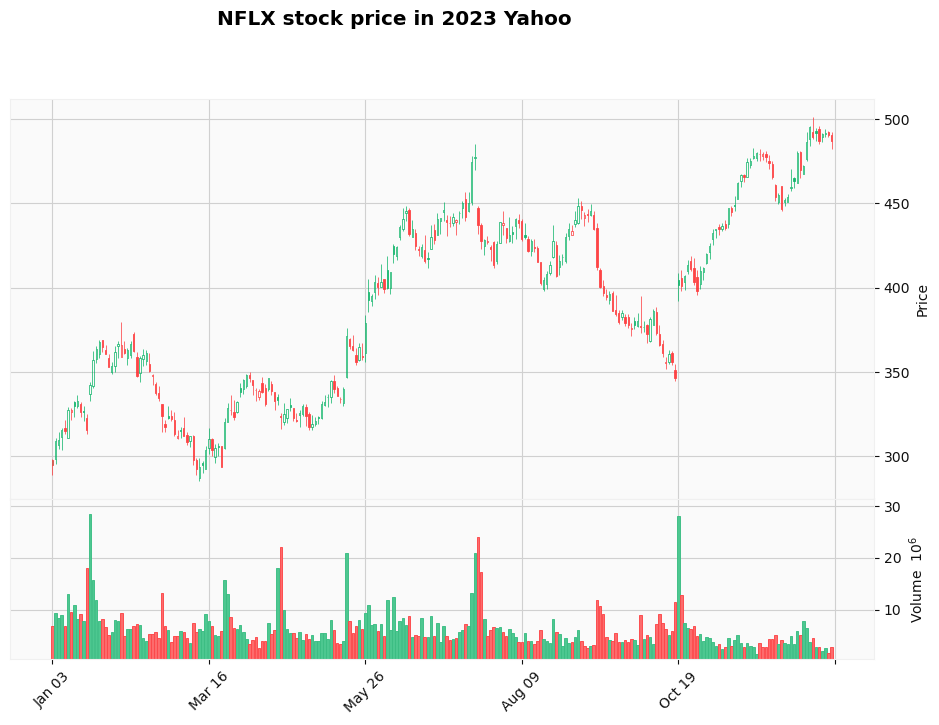

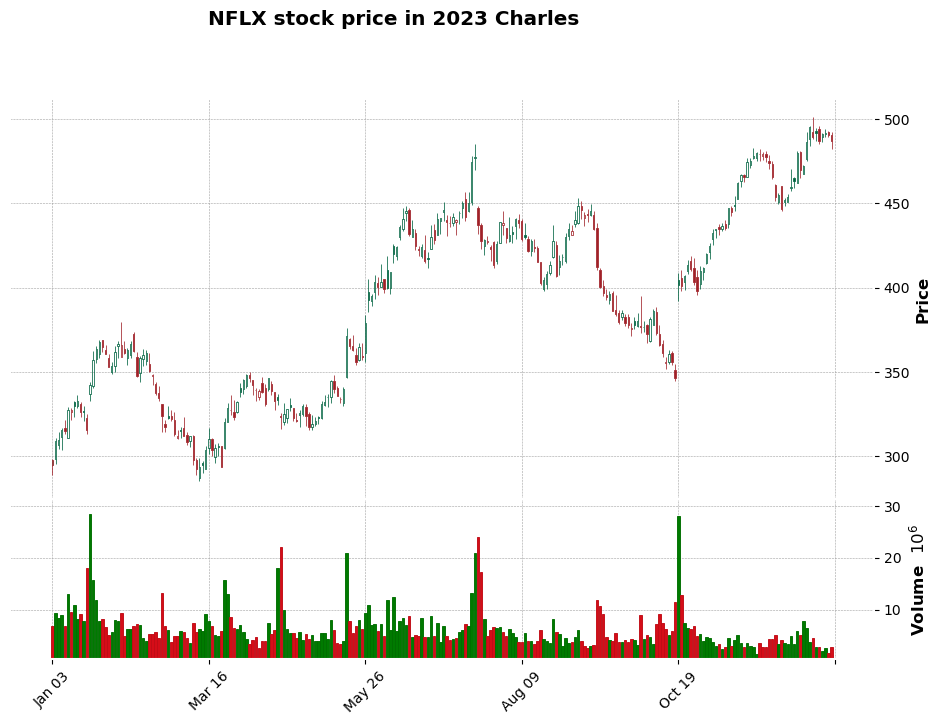

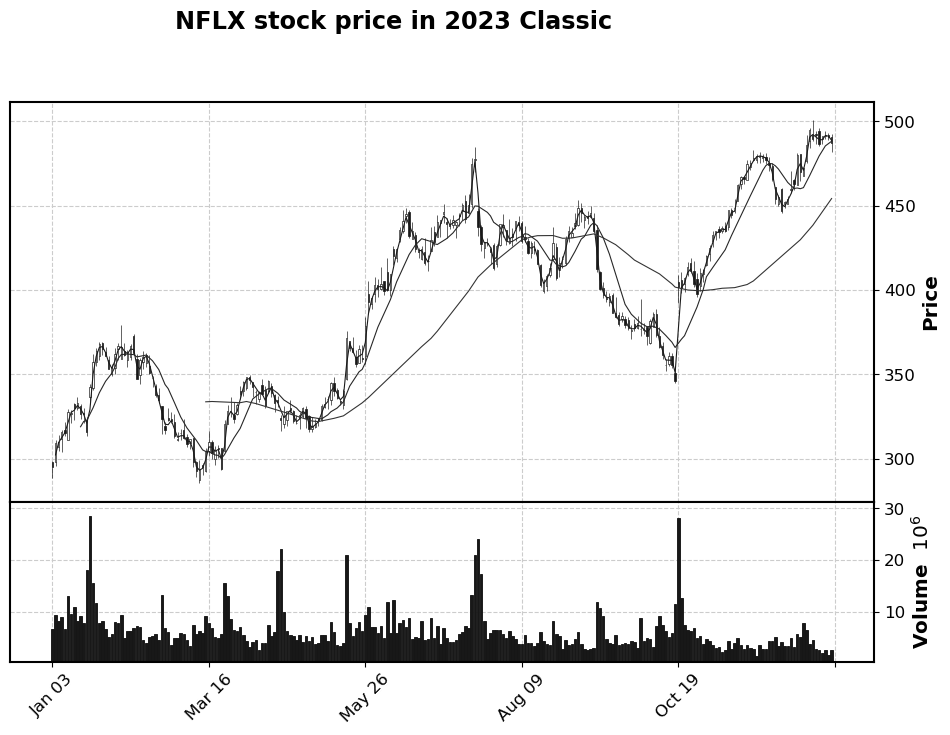

In [4]:
kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 15), figscale = 1, figsize = (12, 8), title = "NFLX stock price in 2023 Yahoo") 

mpf.plot(hist, **kwargs, style = 'yahoo')

kwargs['title'] = "NFLX stock price in 2023 Charles"

mpf.plot(hist, **kwargs, style = 'charles')

kwargs = dict(type = 'candle', volume = True, figratio = (20, 10), mav = (2, 10, 50), figscale = 1, figsize = (12, 8), title = "NFLX stock price in 2023 Classic")

mpf.plot(hist, **kwargs, style = 'classic')

C:\Users\david\Anaconda_23\envs\machine_learning\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


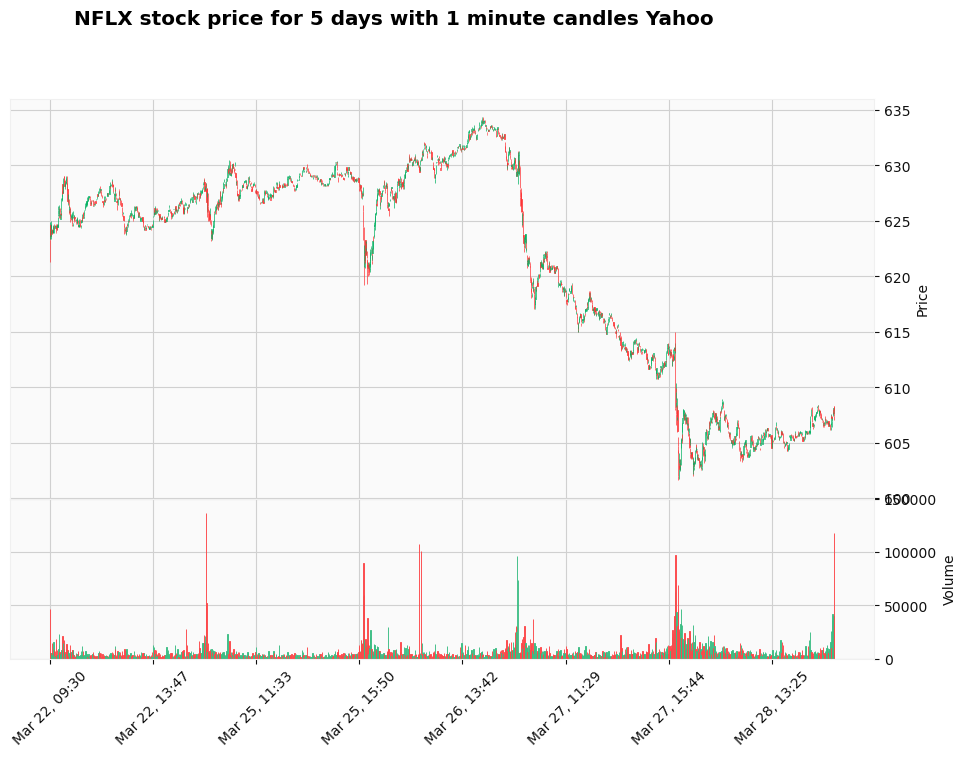

C:\Users\david\Anaconda_23\envs\machine_learning\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


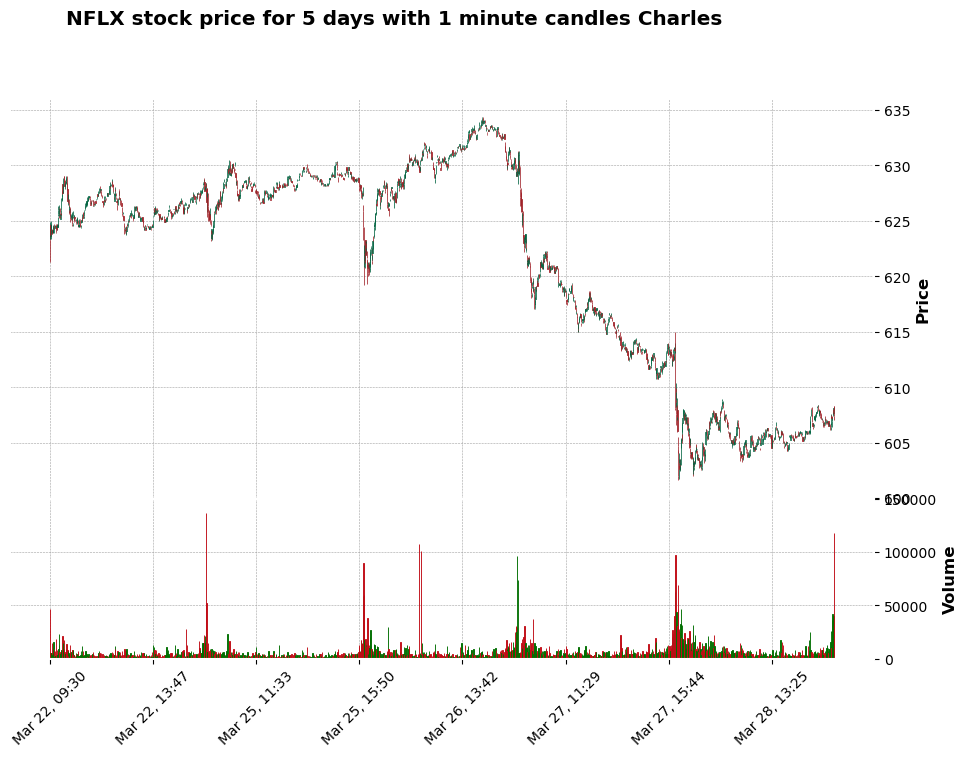

In [5]:
kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 10), figscale = 0.85, figsize = (12, 8), title = "NFLX stock price for 5 days with 1 minute candles Yahoo") 

mpf.plot(histMin, **kwargs, style = 'yahoo')

kwargs['title'] = "NFLX stock price for 5 days with 1 minute candles Charles"

mpf.plot(histMin, **kwargs, style = 'charles')


The cell below takes stock price data for the previous day with 1 minute granularity and plots it.

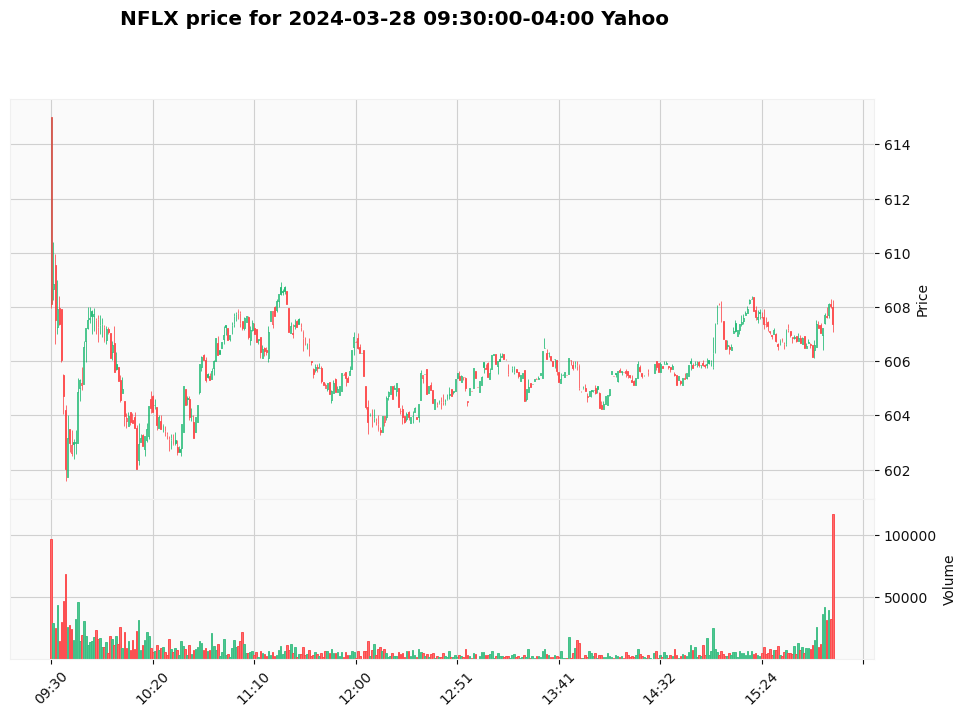

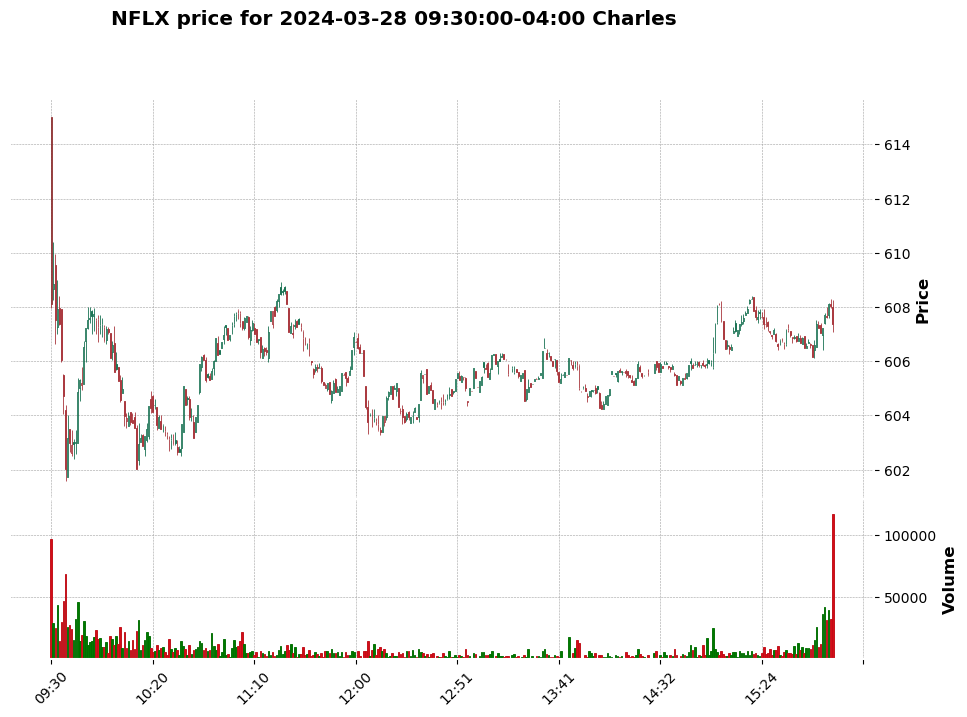

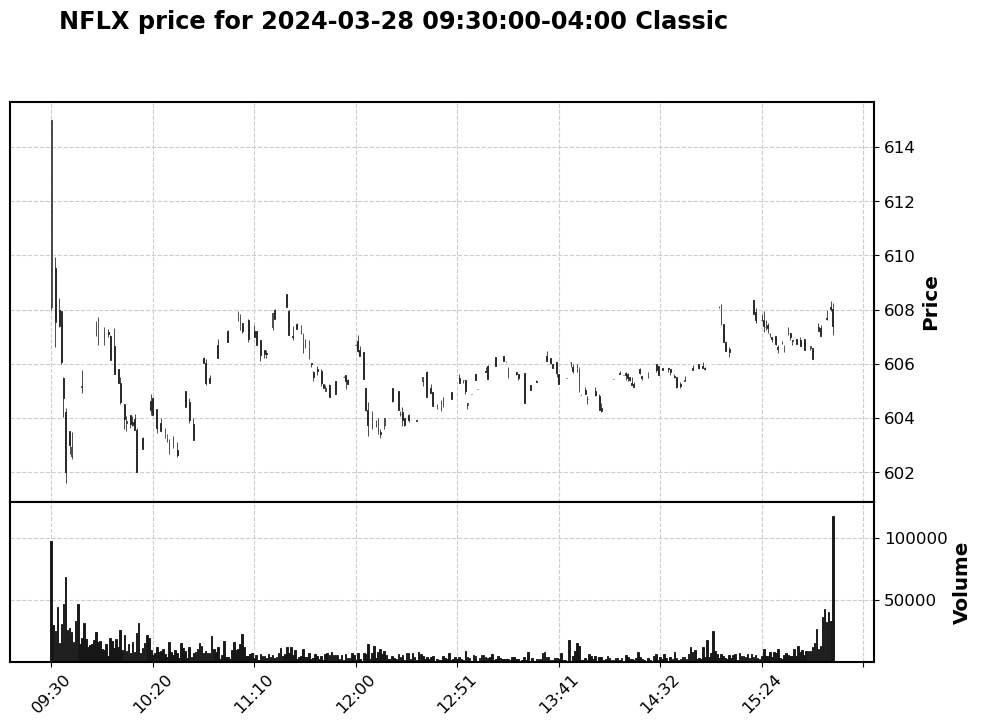

In [6]:
histOne = data.history(period = '1d', interval = '1m')

day = str(histOne.index[0])

# print(i)

plTitle = "NFLX price for " + day + " Yahoo"

# print(myTitle)

kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 10), figscale = 0.85, figsize = (12, 8), title = plTitle) 

mpf.plot(histOne, **kwargs, style = 'yahoo')

kwargs['title'] = "NFLX price for " + day + " Charles"

mpf.plot(histOne, **kwargs, style = 'charles')

kwargs['title'] = "NFLX price for " + day + " Classic"

mpf.plot(histOne, **kwargs, style = 'classic')

The next task in the project is to implement machine learning for time series forecasting. The type of model implemented is a Long Short-Term Memory or LSTM. It is a type of neural network and can be classified as a recurrent neural network. You'll notice the code works by generating an instance of the model at each pass in order to propogate through the network on the next pass. The model was used to predict daily closing prices for 49 days since it was trained and tested by an 80-20 split. I.e. the first 80% of the price data was used to train the model and the latter 20% was used to test the predictions against the actual values. There is a cell with a plot using Matplotlib that shows the actual values and the model predicted values. A question I asked myself before applying some model for the regression task is what features are most meaningful? What granularity seems appropriate for the target feature?

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
250


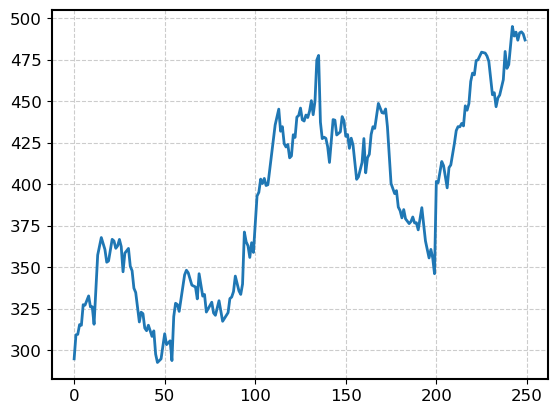

In [7]:
import matplotlib.pyplot as plt

print(hist.columns)

print(type(hist))

ts = hist[['Close']].values.astype('float32') # convert to numpy array

print(type(ts))

print(len(ts)) # number of steps

plt.plot(ts)

plt.show()

The plot above shows only the close prices for Netflix's stock in fiscal 2023. 250 trading days occurred. The LSTM model will predict close prices for the latter 20% of the days.

In [8]:
train_size = int(len(ts) * 0.80)

test_size = len(ts) - train_size

train, test = ts[:train_size], ts[train_size:]

In [9]:
import torch
# Args; dataset is a time series of close prices, lookback is the window size for prediction.
# Returns; PyTorch tensors with the feature and target variables, i.e. X, y.
def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i: i + lookback]
        target = dataset[i + 1: i + lookback + 1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [10]:
lookback = 4

X_train, y_train = create_dataset(train, lookback = lookback)

X_test, y_test = create_dataset(test, lookback = lookback)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape) # Note, 2 data points got lost in train and test.

torch.Size([196, 4, 1]) torch.Size([196, 4, 1])
torch.Size([46, 4, 1]) torch.Size([46, 4, 1])


C:\Users\david\AppData\Local\Temp\ipykernel_19072\905602938.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  return torch.tensor(X), torch.tensor(y)


https://stackoverflow.com/questions/71729671/python-yfinance-failed-downloads-no-data-found-symbol-may-be-delisted
This cell contains a useful post about reinstalling Yfinance when it's not working properly.

In [11]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np

train_loss = []

class PriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        # train on 1 feature; Close price
        self.lstm = nn.LSTM(input_size = 1, hidden_size = 50, num_layers = 1, batch_first = True)
        self.linear = nn.Linear(50, 1)
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [12]:
model = PriceModel()

optimizer = optim.Adam(model.parameters())

loss_fn = nn.MSELoss()

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 != 0:
        continue

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        train_loss.append(train_rmse.item())
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss)

    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    train_plot = np.ones_like(ts) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback : train_size] = model(X_train)[:, -1,:]
    test_plot = np.ones_like(ts) * np.nan
    test_plot[train_size + lookback : len(ts) ] = model(X_test)[:, -1,:]
    

Epoch 0: train RMSE 377.3206, test RMSE 417.1925
Epoch 100: train RMSE 307.0436, test RMSE 327.0819
Epoch 200: train RMSE 243.1011, test RMSE 228.5332
Epoch 300: train RMSE 182.6216, test RMSE 207.1505
Epoch 400: train RMSE 127.3422, test RMSE 107.8285
Epoch 500: train RMSE 83.0519, test RMSE 58.3093
Epoch 600: train RMSE 60.8281, test RMSE 77.9113
Epoch 700: train RMSE 55.3309, test RMSE 53.5785
Epoch 800: train RMSE 30.2437, test RMSE 44.5298
Epoch 900: train RMSE 24.9861, test RMSE 29.2814
Epoch 1000: train RMSE 23.6667, test RMSE 17.8741
Epoch 1100: train RMSE 22.7076, test RMSE 19.1174
Epoch 1200: train RMSE 21.3718, test RMSE 26.3999
Epoch 1300: train RMSE 19.7512, test RMSE 18.0157
Epoch 1400: train RMSE 18.4279, test RMSE 19.0334
Epoch 1500: train RMSE 16.6529, test RMSE 22.7084
Epoch 1600: train RMSE 15.3780, test RMSE 15.1219
Epoch 1700: train RMSE 13.7603, test RMSE 20.9813
Epoch 1800: train RMSE 13.9843, test RMSE 13.2459
Epoch 1900: train RMSE 11.3911, test RMSE 9.7179


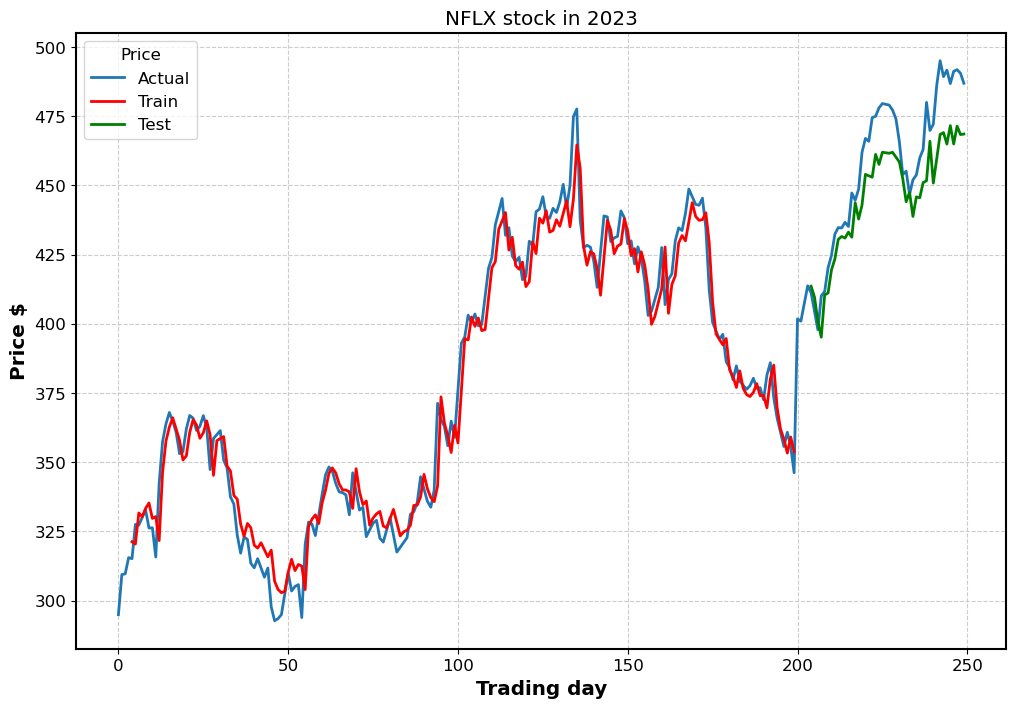

In [13]:
plt.figure(figsize=(12,8))

plt.xlabel("Trading day")

plt.ylabel("Price $")

plt.title("NFLX stock in 2023")

plt.plot(ts, label = "Actual")

plt.plot(train_plot, c='r', label="Train")

plt.plot(test_plot, c='g', label="Test")

plt.legend(title = "Price")

plt.show()

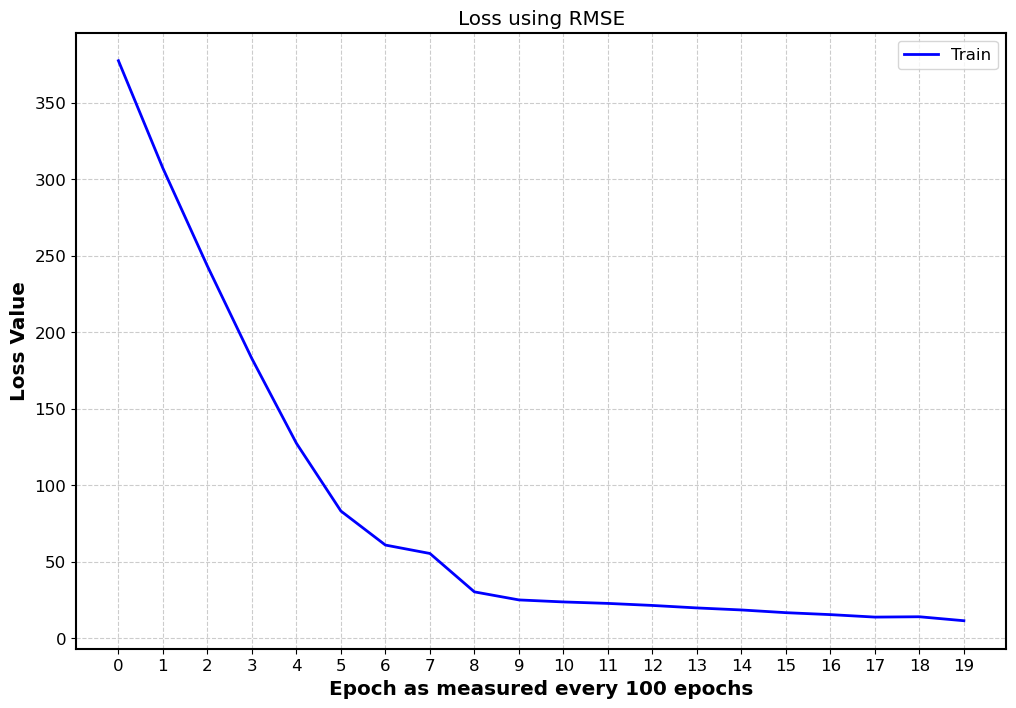

In [14]:
plt.figure(figsize=(12,8))

plt.title("Loss using RMSE")

plt.plot(train_loss, color='b',label="Train")

#plt.plot(test_loss, color='r', label="Test")

custom_ticks = range(0, 20) # 20 epochs measured since it checked every 100; 2000 total epochs

plt.xlabel("Epoch as measured every 100 epochs")

plt.ylabel("Loss Value")

plt.xticks(custom_ticks)

plt.legend()

plt.show()